# Two Sample T Test

A Two Sample T Test compares the means of two samples. It determines whether 
there is sufficient (statistical) evidence that there is a difference in the means. This 
is practically useful to prove there is a difference (e.g., before/after), such as confirming improvements were efficacious.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from stats_tests import two_ttest
from stats_plots import qqplot, boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [3]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Two Sample T Test",
        usecols = ["Month_1", "Airbags Produced",
                   "Defects Identified",
                   "Defects per Airbag", "Shift"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,Month_1,Airbags Produced,Defects Identified,Defects per Airbag,Shift
0,2018-01-01,1013,192,0.189536,Before
1,2018-02-01,992,195,0.196573,Before
2,2018-03-01,960,100,0.104167,Before
3,2018-04-01,996,207,0.207831,Before
4,2018-05-01,983,194,0.197355,Before


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month_1             45 non-null     datetime64[ns]
 1   Airbags Produced    45 non-null     int64         
 2   Defects Identified  45 non-null     int64         
 3   Defects per Airbag  45 non-null     float64       
 4   Shift               45 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.9+ KB


In [5]:
df['Shift'] = df['Shift'].astype('category')

## Normality check

- Normality of both samples is an assumption that must be met for a two sample T test.
- Note that each of the datasets (in this example before and after the machine was installed) must be normally distributed.

In [6]:
# Separate data by shift
data_dict = {
    "Before": df[df["Shift"] == "Before"]["Defects per Airbag"].dropna().values,
    "After": df[df["Shift"] == "After"]["Defects per Airbag"].dropna().values
}


Mean: 0.1982
Stdev: 0.0203
A² (raw): 3.0303
A²* (adj.): 3.1168
Approx. p-value: 0.0000

Mean: 0.3702
Stdev: 0.0299
A² (raw): 0.6215
A²* (adj.): 0.6561
Approx. p-value: 0.0868


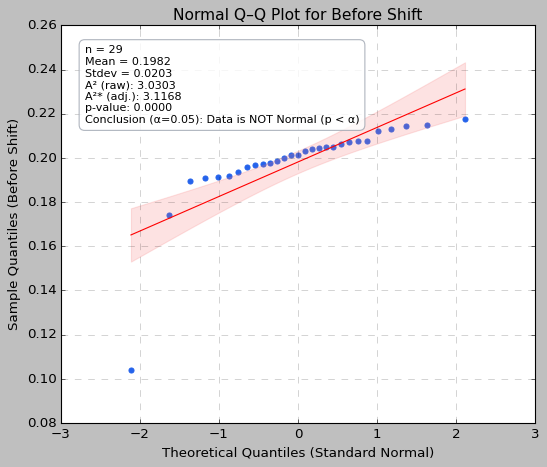

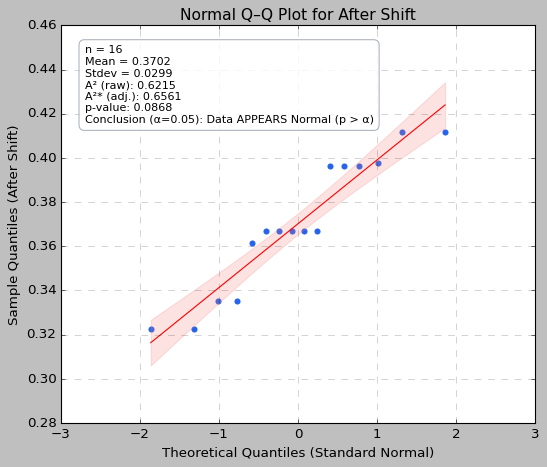

In [7]:
plot_1 = qqplot(data_dict["Before"], label="Before Shift")
plot_2 = qqplot(data_dict["After"], label="After Shift")

### Normality assumptions
 - The before data is not normal.
 - To be normal, most dots should be inside the confidence bands.
 - Both P-values should be > alpha 0.05.
 - Order of preference as what to do next:
   - See if outlier point is correct.
   - If yes, use a nonparametric test.
   - Data transformation is possible but should be used as the final option.

### Remove the outlier, row number 3

In [8]:
# Separate data by shift
before_data = df[df["Shift"] == "Before"]["Defects per Airbag"].dropna().values
after_data = df[df["Shift"] == "After"]["Defects per Airbag"].dropna().values

# Remove the third data point from "Before" shift
before_data_clean = np.delete(before_data, 2)  # index 2 = third element

data_dict = {
    "Before (Outlier Removed)": before_data_clean,
    "After": after_data
}


Mean: 0.2015
Stdev: 0.0094
A² (raw): 0.2425
A²* (adj.): 0.2497
Approx. p-value: 0.7458

Mean: 0.3702
Stdev: 0.0299
A² (raw): 0.6215
A²* (adj.): 0.6561
Approx. p-value: 0.0868


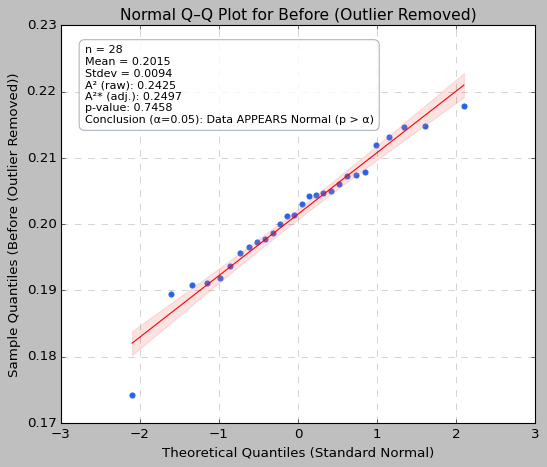

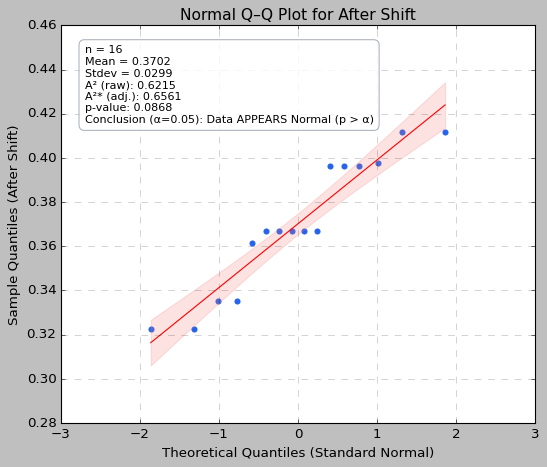

In [9]:
plot_3 = qqplot(before_data_clean, label="Before (Outlier Removed)")
plot_4 = qqplot(after_data, label="After Shift")

### Normality interpretation
  Now the data is considered normal, and you may proceed with the two sample T test (but remember to exclude point 3 in 
that test as well).


## Two sample T test

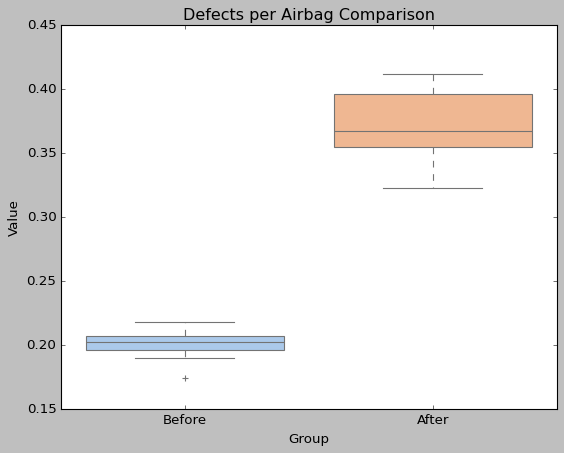

In [10]:
# Prepare your data
before_clean = np.delete(before_data, 2)  # remove 3rd data point
after = after_data

data_dict = {
    "Before (Outlier Removed)": before_clean,
    "After": after
}

result = boxplot(data=[before_clean, after],
        groups=["Before", "After"],
        title="Defects per Airbag Comparison")

In [11]:
results = two_ttest(before_data_clean, after_data, 
                    label1="Before (Outlier Removed)", label2="After")

=== Descriptive Stats ===
                             n     Mean      Std  SE Mean
Before (Outlier Removed)  28.0  0.20152  0.00943  0.00178
After                     16.0  0.37016  0.02991  0.00748

=== Two-Sample t-Test Summary ===
Difference calculated as: Before (Outlier Removed) - After
Mean Difference: -0.16865
95% CI: (np.float64(-0.18488), np.float64(-0.15241))
t-statistic: -21.94
p-value: 0.0
Degrees of Freedom: 16.72
Equal Variance Assumed: False


## Summary

- Note the low P-value (less than alpha 0.05): reject the null that the means before and after are equal.
- Before the mean was 20%, after 37% now.
- Confirms the new assembler is different than the prior one, and has a worse defect rate.